In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [57]:
from sklearn import preprocessing

scaler_x = preprocessing.MinMaxScaler()
scaler_y = preprocessing.MinMaxScaler()

In [58]:
s_x = scaler_x.fit_transform(df.drop('price', axis='columns'))
s_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [59]:
s_y = scaler_y.fit_transform(df['price'].values.reshape(df.shape[0],1))
s_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

# Batch gradient descent

In [60]:
import numpy as np
def batch_gd(X, y_true, epochs, lr=0.01):
    features = X.shape[1]
    w = np.ones(shape = (features))
    b = 0
    samples = X.shape[0]
    error_list = []
    epoch_list = []
    for i in range(epochs):
        y_pred = np.dot(w,X.T)+b # w1*area+w2*bedrooms
        w_grad = -(2/samples)*np.dot(X.T,(y_true-y_pred))
        b_grad = -(2/samples)*np.sum(y_true-y_pred)

        w = w - lr*w_grad
        b = b - lr*b_grad

        error = np.mean(np.square(y_true - y_pred))
        if(i % 10 ==0):
            error_list.append(error)
            epoch_list.append(i)

    return w, b, error,error_list, epoch_list
    
        

In [61]:
w, b, error,error_list, epoch_list  = batch_gd(s_x,s_y.reshape(s_y.shape[0],), 500)
w, b, error

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [62]:
import matplotlib.pyplot as plt

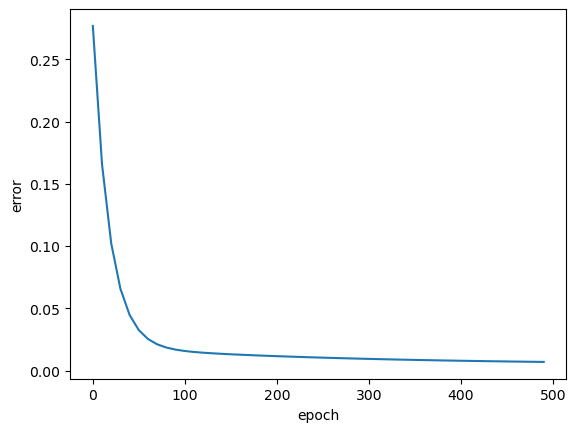

In [63]:
plt.xlabel("epoch")
plt.ylabel("error")
plt.plot(epoch_list,error_list)

In [67]:
def predict(area,bedrooms,w,b):
    scaled_X = scaler_x.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return scaler_y.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [68]:
predict(2600,4,w,b)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [69]:
predict(1000,2,w,b)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [74]:
def stochastic_gd(X, y_true, epochs, lr=0.01):
    features = X.shape[1]
    w = np.ones(shape = (features))
    b = 0
    
    samples = X.shape[0]
    
    error_list = []
    epoch_list = []
    
    for i in range(epochs):
        rand_ind = random.randint(0, samples-1)
        x_value = X[rand_ind]
        y_value = y_true[rand_ind]
        y_pred = np.dot(w,x_value.T)+b # w1*area+w2*bedrooms
        w_grad = -(2/samples)*np.dot(x_value.T,(y_value-y_pred))
        b_grad = -(2/samples)*(y_value-y_pred)

        w = w - lr*w_grad
        b = b - lr*b_grad

        error = np.mean(np.square(y_value - y_pred))
        if(i % 100 ==0):
            error_list.append(error)
            epoch_list.append(i)

    return w, b, error,error_list, epoch_list
        

In [78]:
w_sgd, b_sgd, error_sgd,error_list_sgd, epoch_list_sgd = batch_gd(s_x,s_y.reshape(s_y.shape[0],), 10000)

In [79]:
w_sgd, b_sgd, error_sgd

(array([0.84091889, 0.30663612]), -0.094931088092041, 0.003014872311587657)

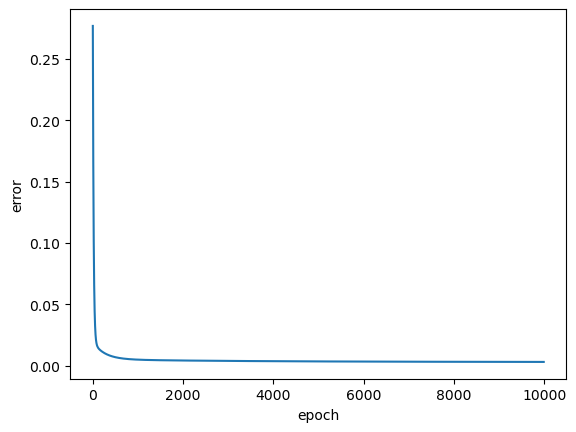

In [80]:
plt.xlabel("epoch")
plt.ylabel("error")
plt.plot(epoch_list_sgd,error_list_sgd)

In [81]:
predict(2600,4,w_sgd,b_sgd)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


120.69441413246746